In [9]:
import pandas as pd
filepath1 = r'D:\安装包\train.csv'
filepath2 = r'D:\安装包\test.csv'
stats = []
train =pd.read_csv(filepath1)
for col in train.columns:
    stats.append((col,train[col].nunique(),
                  train[col].isnull().sum() * 100/train.shape[0],
                  train[col].value_counts(normalize=True,dropna=False).values[0]*100,
                  train[col].dtype))
    stats_df = pd.DataFrame(stats,columns=['Feature','Unique_values','Percentage of missing values','Percentage of values in the biggest category','type'])

stats_df.sort_values('Percentage of missing values',ascending=False)[:10]
    

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
25,MasVnrType,3,59.726027,59.726027,object
57,FireplaceQu,5,47.260274,47.260274,object
3,LotFrontage,110,17.739726,17.739726,float64
59,GarageYrBlt,97,5.547945,5.547945,float64
64,GarageCond,5,5.547945,90.821918,object
58,GarageType,6,5.547945,59.589041,object


<Axes: >

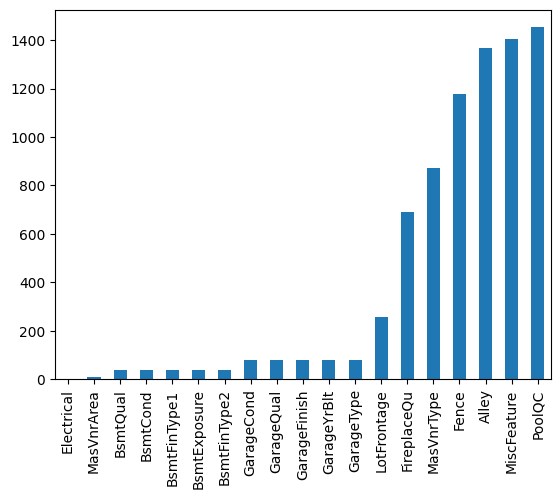

In [10]:
missing = train.isnull().sum()
missing = missing [missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [11]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10120\4212194330.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

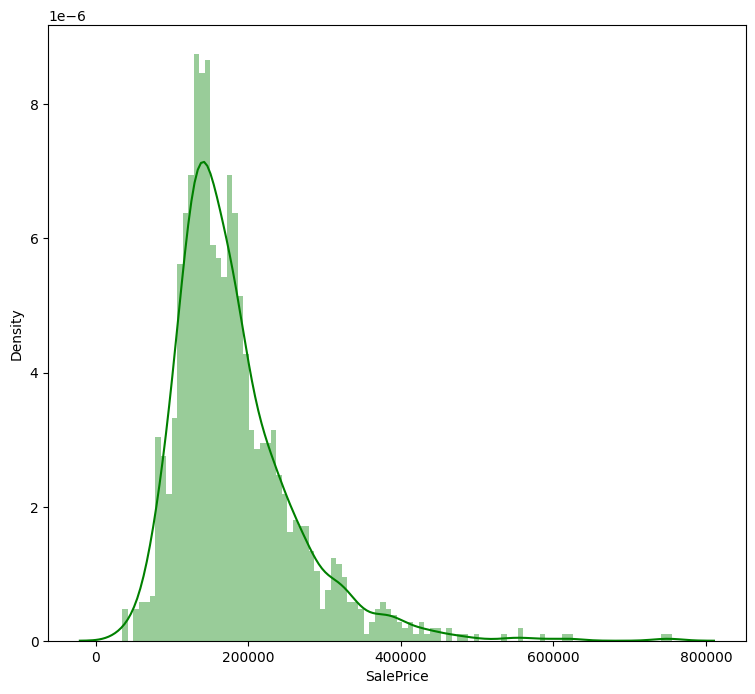

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,8))
sns.distplot(train['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10120\2771932073.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['SalePrice']),color='b',bins=100,hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

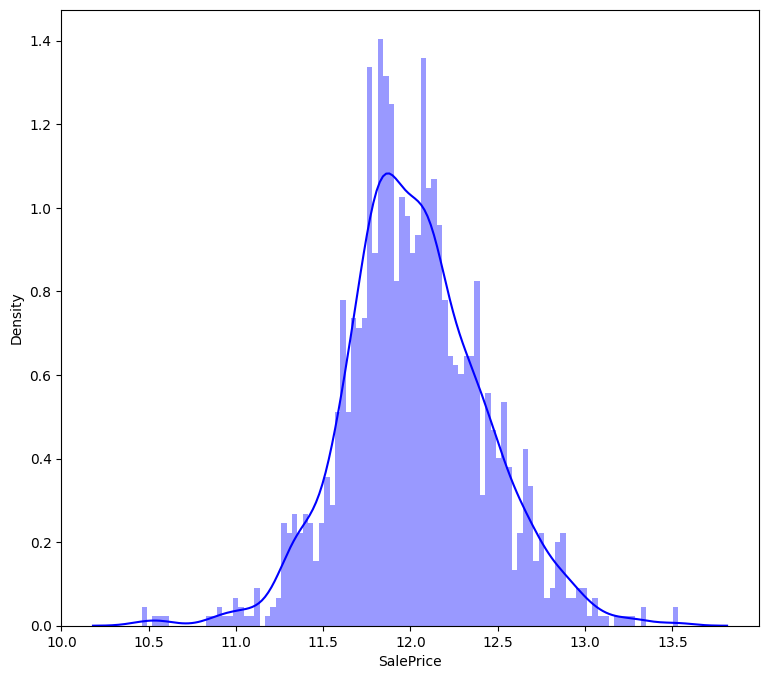

In [13]:
import numpy as np
plt.figure(figsize=(9,8))
sns.distplot(np.log(train['SalePrice']),color='b',bins=100,hist_kws={'alpha':0.4})

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>]], dtype=object)

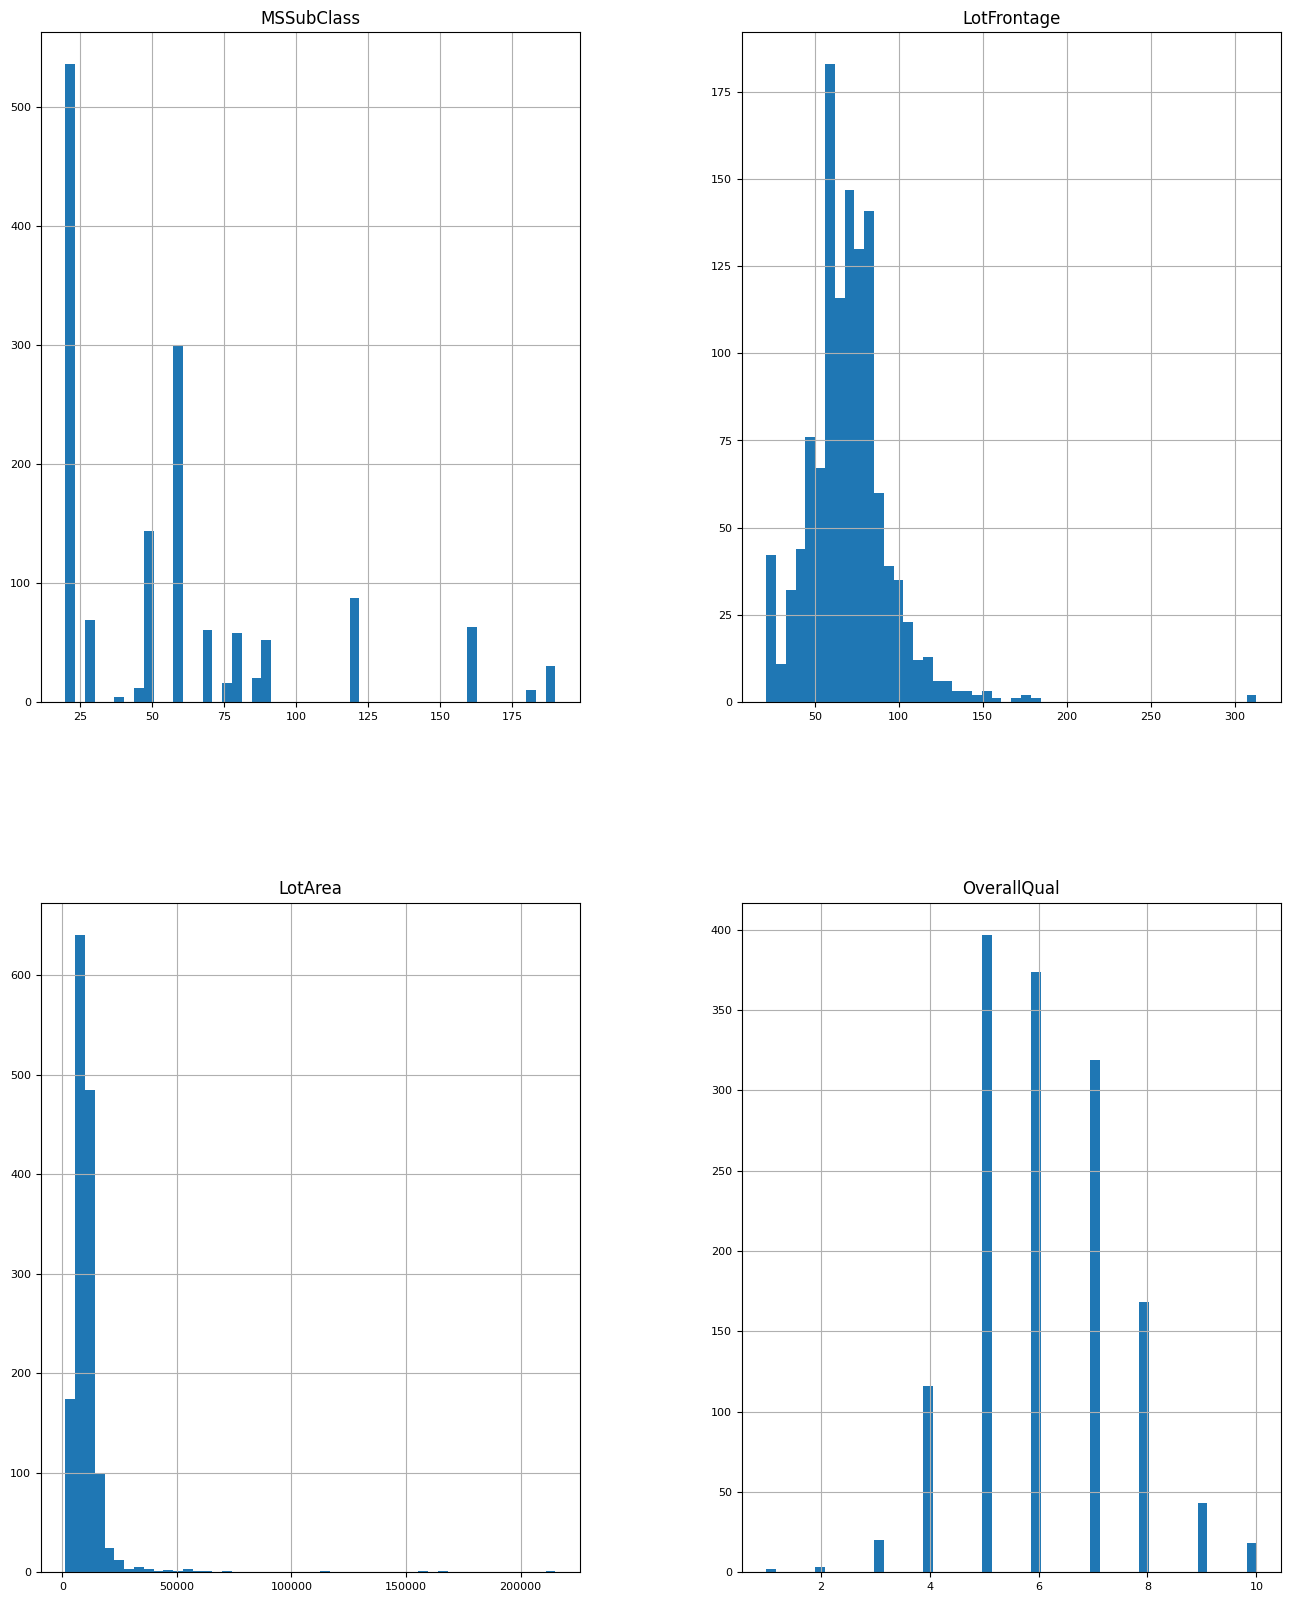

In [14]:
df_num = train.select_dtypes(include=['float64','int64'])
df_num = df_num[df_num.columns.tolist()[1:5]]
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

<Axes: >

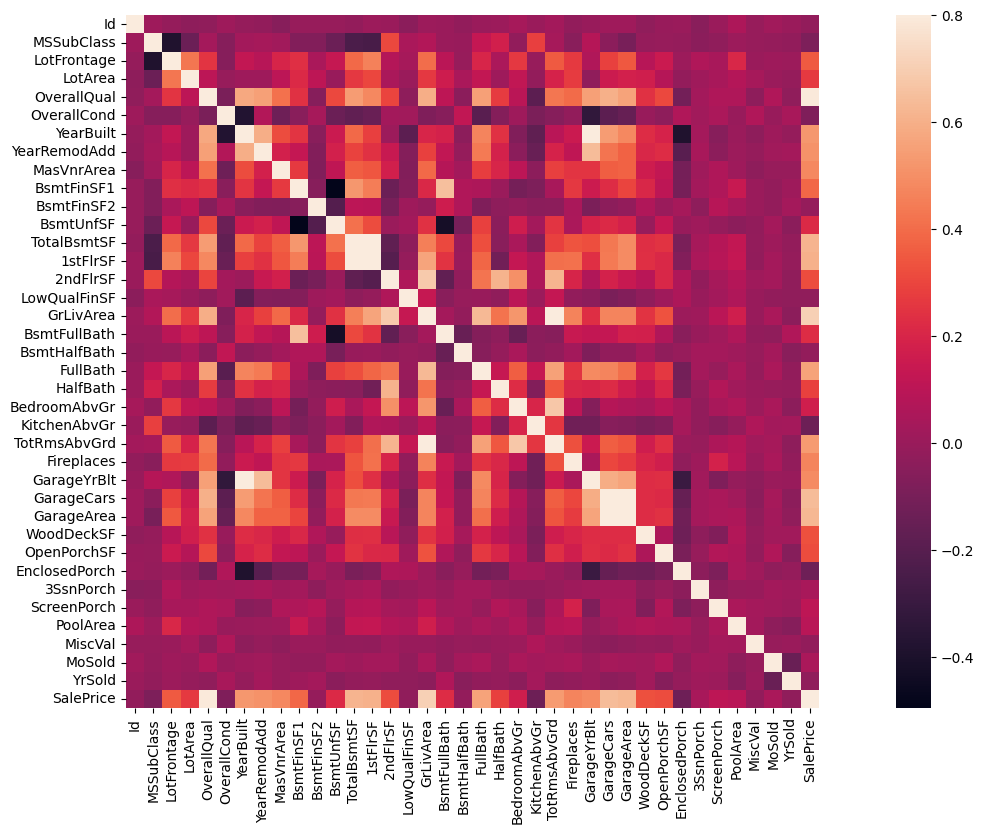

In [18]:
numerical_cols = train.select_dtypes(include=['float64','int64'])
corrmat = numerical_cols.corr()
f, ax =plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10120\1714661752.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


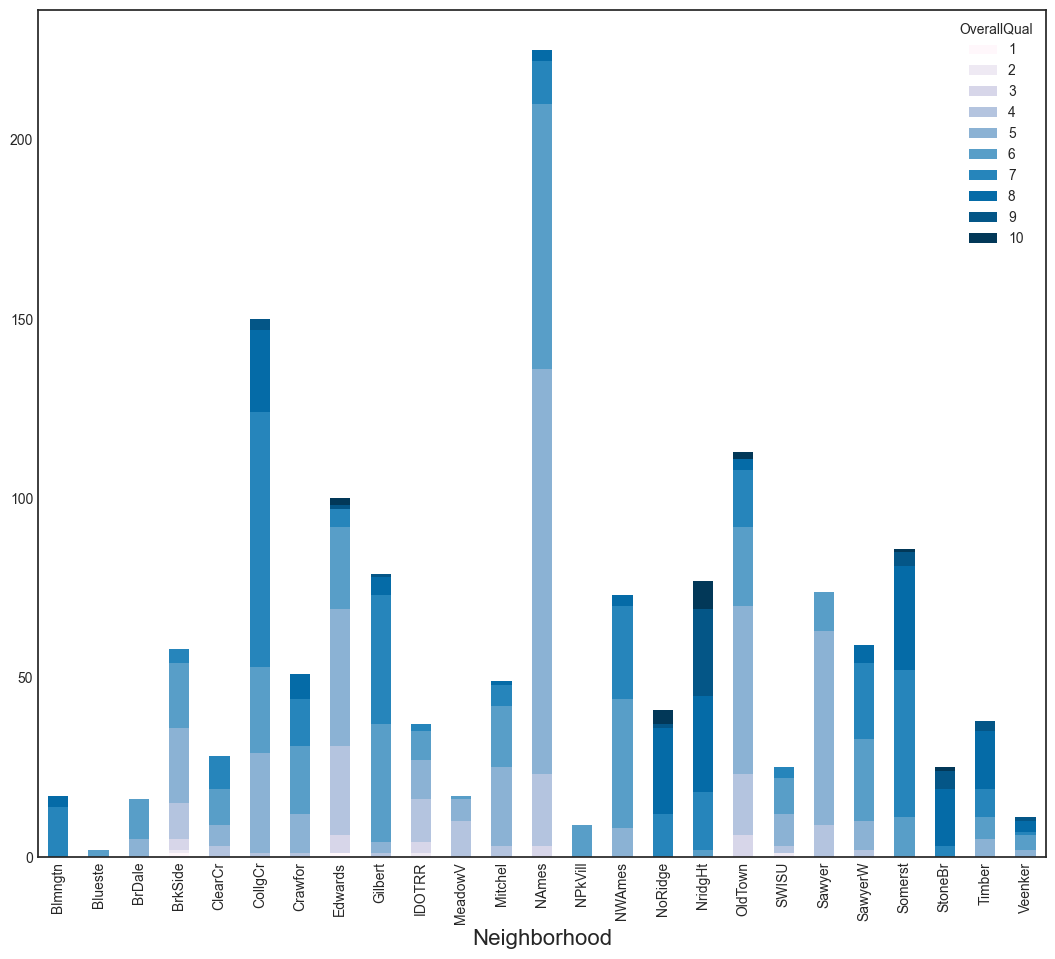

In [21]:
plt.style.use('seaborn-white')
type_cluster = train.groupby(['Neighborhood','OverallQual']).size()
type_cluster.unstack().plot(kind='bar',stacked=True,colormap='PuBu',figsize=(13,11),grid=False)
plt.xlabel('Neighborhood',fontsize=16)
plt.show()